In [22]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#loading dataset

data=pd.read_csv("C:/Users/SathvikChowdariP/final_project_fake_data/ml_fake_data2.csv")
df=pd.DataFrame(data)
df.head()

,Employee ID,Name,Age,Gender,Education Level,Years of Experience,Skill Set,Job Role,Department,Performance Rating,Training Received,Training Recommended
0,2649,Kevin Mason,57,Female,Bachelor's,8,"['SQL', 'Data Analysis', 'Machine Learning']",Project Manager,Project Management,2,Yes,Machine Learning Algorithms
1,9364,Wayne Miller,44,Male,Master's,1,"['Java', 'Project Management', 'SQL', 'Data An...",Business Analyst,Project Management,1,No,Python Programming
2,3383,Mitchell Delgado,51,Female,PhD,20,"['Machine Learning', 'SQL', 'Project Managemen...",Network Administrator,Engineering,1,Yes,Database Management
3,5122,George Glass,39,Male,Bachelor's,23,"['Data Analysis', 'Machine Learning', 'Java', ...",Project Manager,Engineering,4,No,Python Programming
4,7366,Brenda Miller,50,Female,PhD,22,"['Project Management', 'Machine Learning', 'Da...",Data Scientist,Data Science,3,Yes,Machine Learning Algorithms


In [24]:
#checking the shape of data
df.shape

(150000, 12)

In [25]:
#checking for null values
null_columns = df.isnull().sum()
print(null_columns)

Employee ID             0
Name                    0
Age                     0
Gender                  0
Education Level         0
Years of Experience     0
Skill Set               0
Job Role                0
Department              0
Performance Rating      0
Training Received       0
Training Recommended    0
dtype: int64


In [26]:
df.columns


Index(['Employee ID', 'Name', 'Age', 'Gender', 'Education Level',
       'Years of Experience', 'Skill Set', 'Job Role', 'Department',
       'Performance Rating', 'Training Received', 'Training Recommended'],
      dtype='object')

In [27]:
#dropping the irrelavent columns
cols_to_drop = ['Employee ID', 'Name', 'Gender','Training Received'] 
df = df.drop(columns=cols_to_drop)
df.head()

,Age,Education Level,Years of Experience,Skill Set,Job Role,Department,Performance Rating,Training Recommended
0,57,Bachelor's,8,"['SQL', 'Data Analysis', 'Machine Learning']",Project Manager,Project Management,2,Machine Learning Algorithms
1,44,Master's,1,"['Java', 'Project Management', 'SQL', 'Data An...",Business Analyst,Project Management,1,Python Programming
2,51,PhD,20,"['Machine Learning', 'SQL', 'Project Managemen...",Network Administrator,Engineering,1,Database Management
3,39,Bachelor's,23,"['Data Analysis', 'Machine Learning', 'Java', ...",Project Manager,Engineering,4,Python Programming
4,50,PhD,22,"['Project Management', 'Machine Learning', 'Da...",Data Scientist,Data Science,3,Machine Learning Algorithms


In [28]:
#removing square braces from Skill Set
df['Skill Set'] =df['Skill Set'].str.strip("[]").str.replace("'", "").str.replace(", ", ",")
df['Skill Set']

0                        SQL,Data Analysis,Machine Learning
1                 Java,Project Management,SQL,Data Analysis
2         Machine Learning,SQL,Project Management,Python...
3         Data Analysis,Machine Learning,Java,Project Ma...
4         Project Management,Machine Learning,Data Analysis
                                ...                        
149995                  Machine Learning,Project Management
149996                Machine Learning,Data Analysis,Python
149997                                   Project Management
149998                         Machine Learning,Python,Java
149999                                               Python
Name: Skill Set, Length: 150000, dtype: object


 # Exploratory Data Analysis

In [29]:
num_vars = ['Years of Experience', 'Performance Rating']
cat_vars = [ 'Education Level', 'Job Role', 'Department', 'Training Recommended']

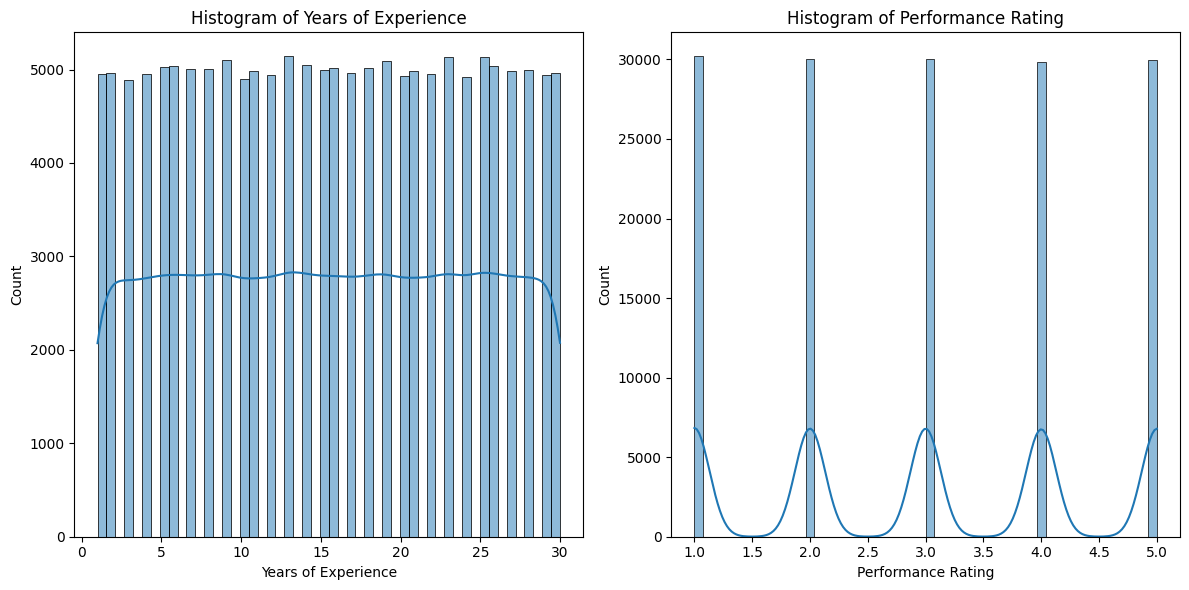

In [30]:
# Plot histograms for numerical variables
plt.figure(figsize=(12, 6))
for i, var in enumerate(num_vars, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

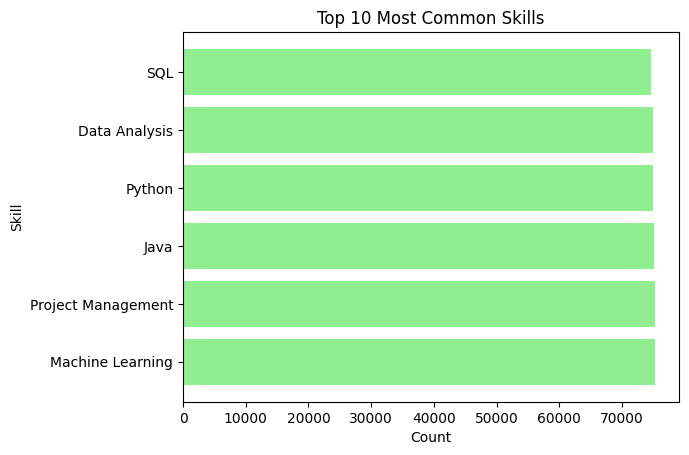

In [31]:
from collections import Counter

# Split the skill sets and flatten the list
skills = [skill.strip() for sublist in df['Skill Set'].str.split(',') for skill in sublist]

# Count the occurrences of each individual skill
skills_counts = Counter(skills)

# Plot most common skills
common_skills = skills_counts.most_common(10)
skills, counts = zip(*common_skills)
plt.barh(skills, counts, color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.title('Top 10 Most Common Skills')
plt.show()

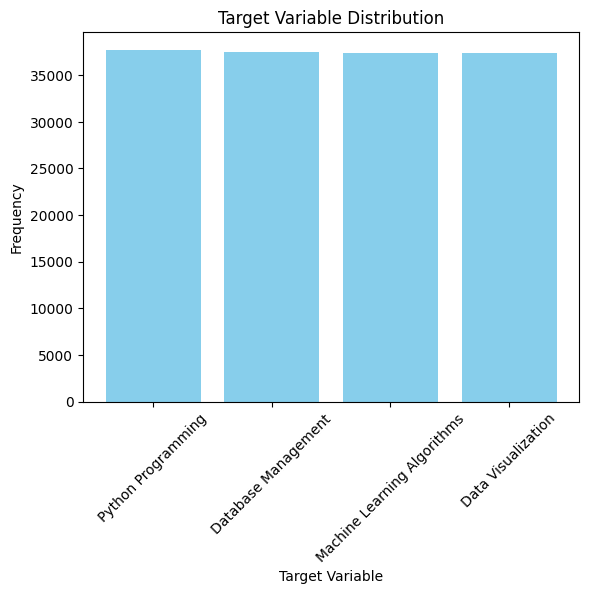

In [32]:
# Count frequency of each target variable
target_counts = df['Training Recommended'].value_counts()

# Plot target variable distribution
plt.bar(target_counts.index, target_counts.values, color='skyblue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Target Variable Distribution')
plt.xticks(rotation=45)
plt.show()

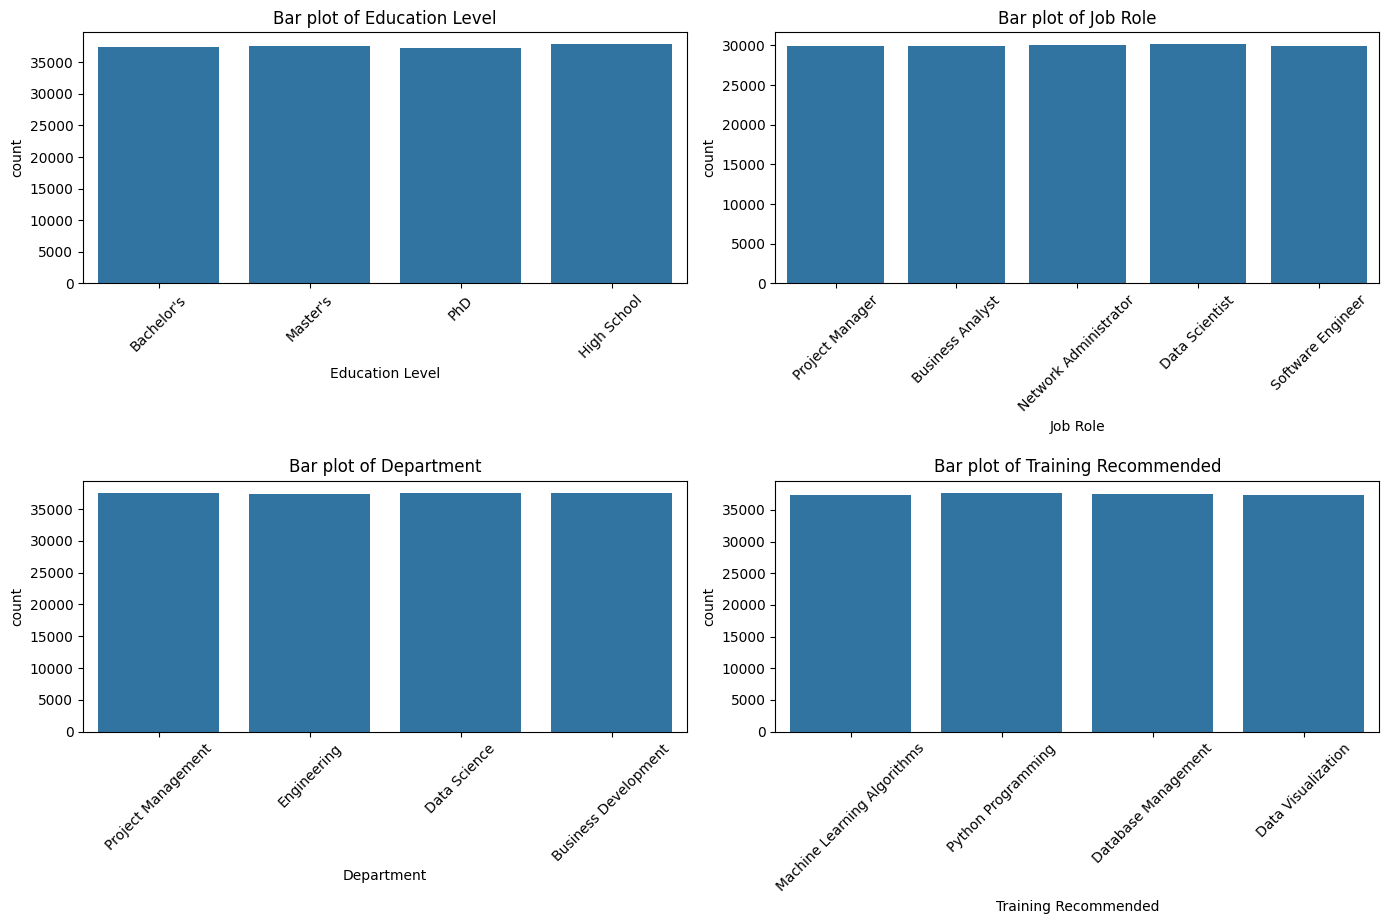

In [33]:
# Plot bar plots for categorical variables
plt.figure(figsize=(14, 12))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Bar plot of {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



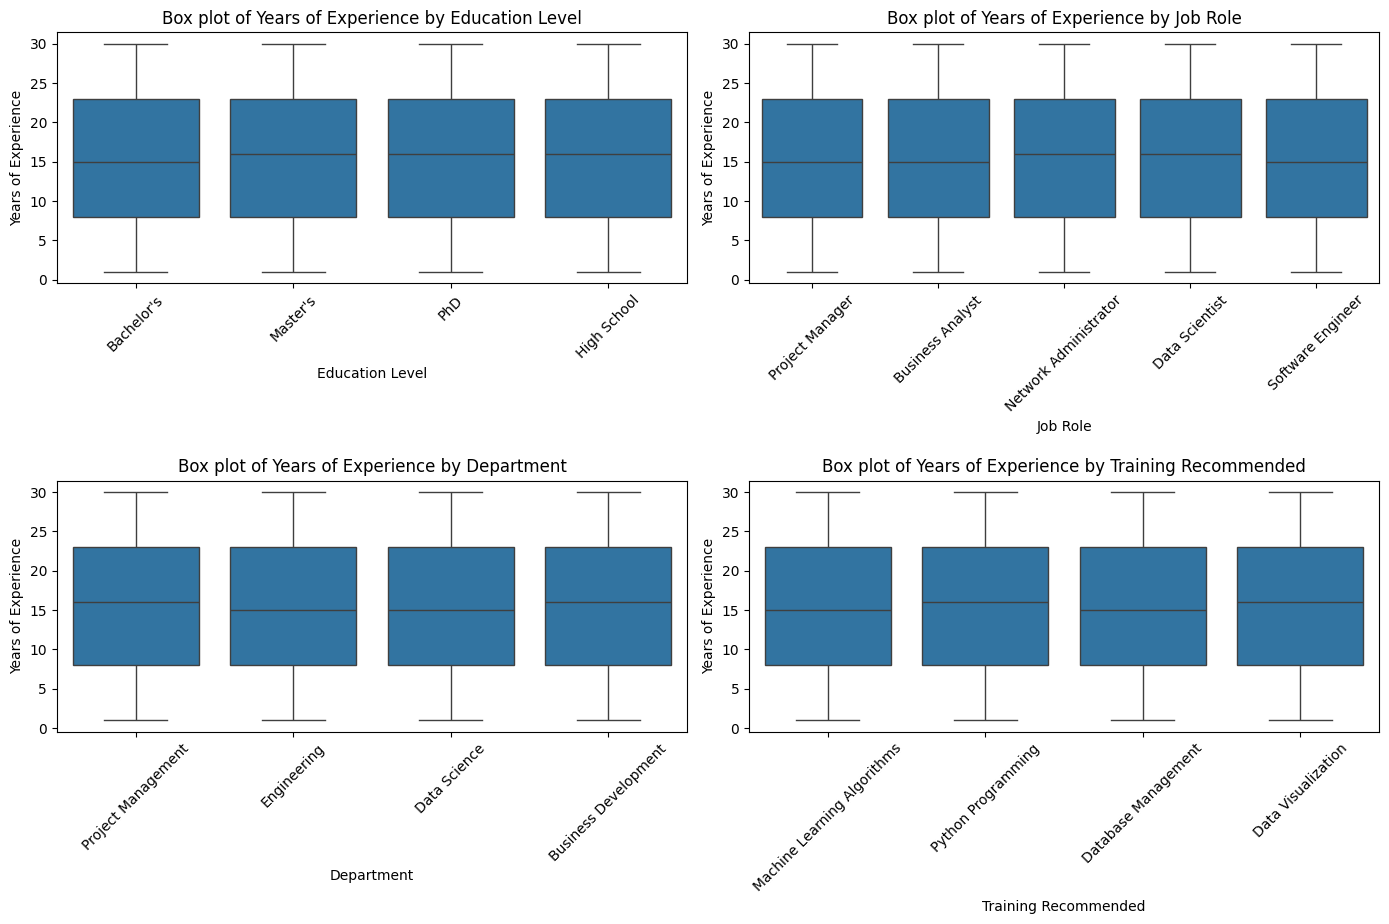

In [34]:
# Numerical vs. categorical variables
plt.figure(figsize=(14, 12))
for i, cat_var in enumerate(cat_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=cat_var, y='Years of Experience')
    plt.title(f'Box plot of Years of Experience by {cat_var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### no outliers in the data

### Multi-label classification 

In [35]:
from sklearn.preprocessing import MultiLabelBinarizer

df['Skill Set'] = df['Skill Set'].str.split(',')
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'Skill Set' column
skills_encoded = mlb.fit_transform(df['Skill Set'])

# Create a DataFrame for encoded skills
skills_df = pd.DataFrame(skills_encoded, columns=mlb.classes_)

# Concatenate encoded skills with the original DataFrame
df = pd.concat([df, skills_df], axis=1)
# Drop the original 'Skill Set' column
df.drop(columns=['Skill Set'], inplace=True)
df



,Age,Education Level,Years of Experience,Job Role,Department,Performance Rating,Training Recommended,Data Analysis,Java,Machine Learning,Project Management,Python,SQL
0,57,Bachelor's,8,Project Manager,Project Management,2,Machine Learning Algorithms,1,0,1,0,0,1
1,44,Master's,1,Business Analyst,Project Management,1,Python Programming,1,1,0,1,0,1
2,51,PhD,20,Network Administrator,Engineering,1,Database Management,0,1,1,1,1,1
3,39,Bachelor's,23,Project Manager,Engineering,4,Python Programming,1,1,1,1,0,0
4,50,PhD,22,Data Scientist,Data Science,3,Machine Learning Algorithms,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,62,High School,21,Business Analyst,Project Management,2,Python Programming,0,0,1,1,0,0
149996,63,PhD,17,Network Administrator,Project Management,3,Database Management,1,0,1,0,1,0
149997,39,Master's,28,Project Manager,Data Science,4,Database Management,0,0,0,1,0,0
149998,30,Bachelor's,2,Software Engineer,Project Management,1,Python Programming,0,1,1,0,1,0


In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to be label encoded
columns_to_encode = ['Education Level', 'Job Role', 'Department', 'Training Recommended']

# Iterate over each column and perform label encoding
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the DataFrame with label encoded columns
df


,Age,Education Level,Years of Experience,Job Role,Department,Performance Rating,Training Recommended,Data Analysis,Java,Machine Learning,Project Management,Python,SQL
0,57,0,8,3,3,2,2,1,0,1,0,0,1
1,44,2,1,0,3,1,3,1,1,0,1,0,1
2,51,3,20,2,2,1,1,0,1,1,1,1,1
3,39,0,23,3,2,4,3,1,1,1,1,0,0
4,50,3,22,1,1,3,2,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,62,1,21,0,3,2,3,0,0,1,1,0,0
149996,63,3,17,2,3,3,1,1,0,1,0,1,0
149997,39,2,28,3,1,4,1,0,0,0,1,0,0
149998,30,0,2,4,3,1,3,0,1,1,0,1,0


## Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'Years of Experience' column to a 2D array
years_of_experience = df['Years of Experience'].values.reshape(-1, 1)

# Perform Min-Max scaling
normalized_years_of_experience = scaler.fit_transform(years_of_experience)

# Replace the original 'Years of Experience' column with the normalized values
df['Years of Experience'] = normalized_years_of_experience



### Correlation analysis

In [38]:
numeric_df = df.select_dtypes(include=['number'])
correlation=numeric_df.corr()
correlation

,Age,Education Level,Years of Experience,Job Role,Department,Performance Rating,Training Recommended,Data Analysis,Java,Machine Learning,Project Management,Python,SQL
Age,1.000000,-0.004671,0.002337,0.003807,-0.002568,0.002613,0.000210,-0.004508,0.003646,-0.000564,-0.002116,0.001972,-0.000019
Education Level,-0.004671,1.000000,0.001432,-0.005400,0.000651,0.001299,0.001752,0.001324,0.005100,-0.000602,-0.000847,0.000322,0.000504
Years of Experience,0.002337,0.001432,1.000000,-0.002071,0.000833,0.003830,0.001981,-0.001782,0.000192,-0.001401,-0.002389,-0.003243,-0.002209
Job Role,0.003807,-0.005400,-0.002071,1.000000,0.001332,-0.000725,0.001781,0.001405,-0.003830,0.001739,0.004192,-0.000925,0.005337
Department,-0.002568,0.000651,0.000833,0.001332,1.000000,0.002690,-0.002165,-0.002360,0.001067,0.000542,0.003909,-0.001013,-0.003105
Performance Rating,0.002613,0.001299,0.003830,-0.000725,0.002690,1.000000,0.001385,-0.001132,0.000861,-0.001626,-0.001175,-0.002742,-0.005008
Training Recommended,0.000210,0.001752,0.001981,0.001781,-0.002165,0.001385,1.000000,0.002487,-0.002971,0.000691,0.001651,-0.002318,-0.005289
Data Analysis,-0.004508,0.001324,-0.001782,0.001405,-0.002360,-0.001132,0.002487,1.000000,0.066921,0.068844,0.068270,0.068267,0.070678
Java,0.003646,0.005100,0.000192,-0.003830,0.001067,0.000861,-0.002971,0.066921,1.000000,0.066049,0.066542,0.066227,0.067927
Machine Learning,-0.000564,-0.000602,-0.001401,0.001739,0.000542,-0.001626,0.000691,0.068844,0.066049,1.000000,0.067943,0.065908,0.063970


In [39]:
# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['Training Recommended'])  # Features
y = df['Training Recommended'] 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "k-NN": KNeighborsClassifier(),
    
}
 
# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")
    print(f"Classification Report of {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50)


Training Logistic Regression...
Accuracy of Logistic Regression: 0.25206666666666666
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.26      0.17      0.21      3700
           1       0.25      0.19      0.21      3730
           2       0.26      0.20      0.22      3784
           3       0.25      0.45      0.32      3786

    accuracy                           0.25     15000
   macro avg       0.25      0.25      0.24     15000
weighted avg       0.25      0.25      0.24     15000

Training Decision Tree...
Accuracy of Decision Tree: 0.2402
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.23      0.24      0.24      3700
           1       0.25      0.24      0.24      3730
           2       0.23      0.23      0.23      3784
           3       0.25      0.24      0.25      3786

    accuracy                           0.24     15000
   macro

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameters and their ranges to search
# param_grid = {
#     'n_estimators': [50, 100, 150],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],      # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
# }

# # Instantiate the RandomForestClassifier
# rf = RandomForestClassifier()

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Perform the grid search on the training data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Get the best model
# best_rf = grid_search.best_estimator_

# # Evaluate the best model
# y_pred = best_rf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy of the best RandomForestClassifier:", accuracy)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))